created by: Dora Szabo https://github.com/szaboodoora

We will work on a currently open (as of Oct 2019) comptetion launched by drivendata.
This is an intermediate-level practice competition. Your task is to predict the number of dengue cases each week (in each location) based on environmental variables describing changes in temperature, precipitation, vegetation, and more.

You can read about the problem and data description in detail here:

http://drivendata.co/blog/dengue-benchmark/

https://www.drivendata.org/competitions/44/

This version includes the corrections for to .shift() issue we encountered during the workshop and the solution for correct legend placement and display for the figures.

## This notebook will give you errors if you try to run it without doing the marked exercises. We will make the notebook including the solutions of these exercises available after the workshop.

In [1]:
#Before anything else, we import a few general data science packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First we read in the data files and investigate their shape.
Features stand for input/independent variables, while labels correspond the output/dependent variables.

In [2]:
adf=pd.read_csv("https://raw.githubusercontent.com/budapestpy-workshops/sample_files/master/dengue_features_train.csv")  #The features for the training dataset.
adf1=pd.read_csv("https://raw.githubusercontent.com/budapestpy-workshops/sample_files/master/dengue_features_test.csv") #The features for the test dataset.
adf2=pd.read_csv( "https://raw.githubusercontent.com/budapestpy-workshops/sample_files/master/dengue_labels_train.csv") #The labels/solutions for the training dataset
print("Shape of dengue_features_train: {}".format(adf.shape))
print("Shape of dengue_features_test: {}".format(adf1.shape))
print("Shape of dengue_labels_train: {}".format(adf2.shape))


Shape of dengue_features_train: (1456, 24)
Shape of dengue_features_test: (416, 24)
Shape of dengue_labels_train: (1456, 4)


## Exercise 1

Figure out how many records do we have for the two cities separetely and what their the range in regard to the dates and their index!

We have training data for San Juan from: "start date" (index no) till "end date" (index no)
(total no of rows:)

We have test data for San Juan from: "start date" (index no) till "end date" (index no)
(total no of rows:)

We have training data for Iquitos from: "start date" (index no) till "end date" (index no)
(total no of rows:)

We have test data for Iquitos from: "start date" (index no) till "end date" (index no)
(total no of rows:)


## Solution 1

So our data looks like this:

we have train data from "start date" till "end date" for sj (no of rows:)  


for sj train starts at 1990-04-30 (0) ends with 2008-04-22 (935)
iq train starts at 2000-07-01 (936) and ends with 2010-06-25 (1455)

sj test starts 2008-04-29 (0) ends 2013-04-23 (259)
iq test starts 2010-07-02 (260) ends 2013-06-25 (415)


My solution was with .loc[], but other methods e.g. groupby do the job as well.

print(adf.loc[adf['city']=='iq'])

print(adf1.loc[adf1['city']=='iq'])

Let's have a look at the data
(description of the features here: https://www.drivendata.org/competitions/44/page/82/)

In [3]:
#As we found out during the workshop, for such simple selections, we can succeed without .loc[], too
adf[adf['city']=='iq']

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0
941,iq,2000,31,2000-08-05,0.205529,0.190757,0.231671,0.255314,16.24,297.191429,...,1.00,74.728571,16.24,13.421429,13.771429,25.340000,10.940000,32.0,17.0,11.5
942,iq,2000,32,2000-08-12,0.312486,0.329986,0.380586,0.387271,89.37,297.320000,...,26.68,83.275714,89.37,15.311429,11.471429,27.016667,11.650000,34.0,19.9,72.9
943,iq,2000,33,2000-08-19,0.384133,0.392240,0.341780,0.382750,42.08,297.627143,...,16.90,82.490000,42.08,15.465714,13.700000,26.583333,10.316667,33.0,20.5,50.1
944,iq,2000,34,2000-08-26,0.408157,0.322157,0.406714,0.302714,49.22,298.238571,...,5.59,74.740000,49.22,14.444286,13.771429,26.900000,13.400000,34.0,19.0,89.2
945,iq,2000,35,2000-09-02,0.332043,0.321057,0.314614,0.324257,53.65,299.218571,...,16.07,74.151429,53.65,15.057143,12.457143,27.116667,12.266667,34.0,20.0,78.0


In [4]:
adf.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [5]:
adf2.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


## Exercise 2 Let's combine the two feature datasets before we modify anything in it!
Then, investigate what type of features we have.
## Q: Is everything in the correct format?

In [6]:
all_feature=adf.append(adf1)
#all_feature=adf.append(adf1, ignore_index=True)
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

Let's change its type to the correct format and double check that we indeed modified it!

In [7]:
all_feature['week_start_date']=pd.to_datetime(all_feature['week_start_date'])
all_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1872 entries, 0 to 415
Data columns (total 24 columns):
city                                     1872 non-null object
year                                     1872 non-null int64
weekofyear                               1872 non-null int64
week_start_date                          1872 non-null datetime64[ns]
ndvi_ne                                  1635 non-null float64
ndvi_nw                                  1809 non-null float64
ndvi_se                                  1849 non-null float64
ndvi_sw                                  1849 non-null float64
precipitation_amt_mm                     1857 non-null float64
reanalysis_air_temp_k                    1860 non-null float64
reanalysis_avg_temp_k                    1860 non-null float64
reanalysis_dew_point_temp_k              1860 non-null float64
reanalysis_max_air_temp_k                1860 non-null float64
reanalysis_min_air_temp_k                1860 non-null float64
reanalysis

To make use of the fact that this is a time-series data, let's calculate some features based on past values. 
## Q: How can you calculate such features?

To make it simpler, I calculate these at the same time with a for loop

In [8]:
"""So this cell is not the correct solution, but I leave it here so you can learn from this mistake.
I corrected this in the following cells, so as long as you run the cells in order you should be fine,
but you can also delete/comment out this part"""

selected_features=[
'station_avg_temp_c',                       
'station_diur_temp_rng_c',                  
'station_max_temp_c',                      
'station_min_temp_c',                       
'station_precip_mm',
'precipitation_amt_mm'] 

lag = [1,2]

for col in selected_features:
    for l in lag:
        all_feature.loc[:,col+"_"+str(l)] = all_feature[col].shift(l)   
        
all_feature.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,station_diur_temp_rng_c_1,station_diur_temp_rng_c_2,station_max_temp_c_1,station_max_temp_c_2,station_min_temp_c_1,station_min_temp_c_2,station_precip_mm_1,station_precip_mm_2,precipitation_amt_mm_1,precipitation_amt_mm_2
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,6.900000,NaN,29.4,NaN,20.0,NaN,16.0,NaN,12.42,NaN
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,6.371429,6.900000,31.7,29.4,22.2,20.0,8.6,16.0,22.82,12.42
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,6.485714,6.371429,32.2,31.7,22.8,22.2,41.4,8.6,34.54,22.82
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,6.771429,6.485714,33.3,32.2,23.3,22.8,4.0,41.4,15.36,34.54


As Olivér pointed out, I made an mistake during shifting the values above.
Here I show you what did he mean, how does it look like. In contrast to what I originally imagined,
this function is not very 'smart' and it did not use the date column the way I thought. 
If you apply a .shift[1] you should get the value from the previous period in the next row.
But we have the data for the two cities together and instead of realizing from the date that they are not consecutive,
the function just blindly kept shifting, so the last value from sj appears as the temperature from the
previous week for iq (this issue persist even if you retain the original index when you apply append:  

In [9]:
all_feature_check = all_feature[['city','week_start_date','station_min_temp_c', 'station_min_temp_c_1', 'station_min_temp_c_2']]
all_feature_check.iloc[1450:1460]

,city,week_start_date,station_min_temp_c,station_min_temp_c_1,station_min_temp_c_2
1450,iq,2010-05-21,20.0,21.2,21.4
1451,iq,2010-05-28,22.4,20.0,21.2
1452,iq,2010-06-04,21.7,22.4,20.0
1453,iq,2010-06-11,19.2,21.7,22.4
1454,iq,2010-06-18,21.0,19.2,21.7
1455,iq,2010-06-25,22.2,21.0,19.2
0,sj,2008-04-29,21.7,22.2,21.0
1,sj,2008-05-06,22.2,21.7,22.2
2,sj,2008-05-13,22.8,22.2,21.7
3,sj,2008-05-20,24.4,22.8,22.2


I decided to continue with the original examples and exercises here as it happened on the workshop, and only apply the fix for this issue afterwards.

Next, we will deal with the missing values in a very simple way.


## Homework:
1. What could be a better way to deal with missing values? (this step can improve your submission score)
2. Try out imputer to deal with missing values instead https://scikit-learn.org/stable/modules/impute.html

## Q: Forward or backward fill, which shall we choose and why?


In [10]:
#Because we used .shift() with a positive value, everything shifted "downwards" (the first rows are empy for the new features),
#you need backward fill here 
all_feature.fillna(method='bfill', inplace=True)

# Null check
pd.isnull(all_feature).any()

city                                     False
year                                     False
weekofyear                               False
week_start_date                          False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_t

Let's plot the average temperature to have an overview about our data

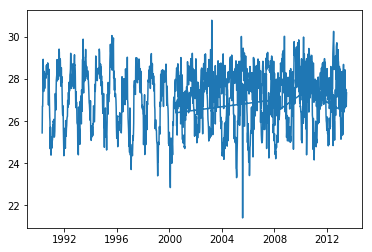

In [11]:
fig, ax = plt.subplots()
ax.plot('week_start_date', 'station_avg_temp_c', data=all_feature)

plt.show()
#https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/date.html


Okay, this looks wrong.
## Q: What could be the problem here?
A: We have multiple data points for the same date (due to the two cities)

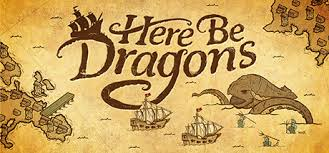

Below you can find the fix for the shift mistake. To solve it we need to reload the all_feature data, so it doesn't have the faulty shifted columns,transform week_start_date to date format again, create the separate data frames for the cities, then rerun the script for creating the shifted values.

In [12]:
all_feature=adf.append(adf1, ignore_index=True)
all_feature['week_start_date']=pd.to_datetime(all_feature['week_start_date'])
# Create seperate data frames for San Juan
sj_features = all_feature.loc[all_feature['city']=='sj'].copy()
sj_labels = adf2.loc[adf2['city']=='sj'].copy()

selected_features=[
'station_avg_temp_c',                                     
'station_max_temp_c',                      
'station_min_temp_c',                       
'station_precip_mm'] 

lag = [1,2,3]

for col in selected_features:
    for l in lag:
        sj_features.loc[:,col+"_"+str(l)] = sj_features[col].shift(l)   
        
sj_features.head()                                                                                            


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,station_avg_temp_c_3,station_max_temp_c_1,station_max_temp_c_2,station_max_temp_c_3,station_min_temp_c_1,station_min_temp_c_2,station_min_temp_c_3,station_precip_mm_1,station_precip_mm_2,station_precip_mm_3
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,NaN,29.4,NaN,NaN,20.0,NaN,NaN,16.0,NaN,NaN
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,NaN,31.7,29.4,NaN,22.2,20.0,NaN,8.6,16.0,NaN
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,25.442857,32.2,31.7,29.4,22.8,22.2,20.0,41.4,8.6,16.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,26.714286,33.3,32.2,31.7,23.3,22.8,22.2,4.0,41.4,8.6


In [13]:
#We also need to fill NaN values for these dataframes

sj_features.fillna(method='bfill', inplace=True)


# Null check
pd.isnull(sj_features).any()

city                                     False
year                                     False
weekofyear                               False
week_start_date                          False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_t

In [14]:
# Create seperate data frames for Iquitos
iq_features = all_feature.loc[all_feature['city']=='iq'].copy()
iq_labels = adf2.loc[adf2['city']=='iq'].copy()

selected_features=[
'station_avg_temp_c',                                     
'station_max_temp_c',                      
'station_min_temp_c',                       
'station_precip_mm'] 

lag = [1,2,3]

for col in selected_features:
    for l in lag:
        iq_features.loc[:,col+"_"+str(l)] = iq_features[col].shift(l)   
        
iq_features.head()                                                                                            


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,station_avg_temp_c_3,station_max_temp_c_1,station_max_temp_c_2,station_max_temp_c_3,station_min_temp_c_1,station_min_temp_c_2,station_min_temp_c_3,station_precip_mm_1,station_precip_mm_2,station_precip_mm_3
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,NaN,32.5,NaN,NaN,20.7,NaN,NaN,3.0,NaN,NaN
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,NaN,34.0,32.5,NaN,20.8,20.7,NaN,55.6,3.0,NaN
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,26.4,33.0,34.0,32.5,20.7,20.8,20.7,38.1,55.6,3.0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,26.9,31.5,33.0,34.0,14.7,20.7,20.8,30.0,38.1,55.6


In [15]:
#We also need to fill NaN values for this dataframes
iq_features.fillna(method='bfill', inplace=True)

# Null check
pd.isnull(iq_features).any()

city                                     False
year                                     False
weekofyear                               False
week_start_date                          False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_t

In [16]:
sj_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,station_avg_temp_c_3,station_max_temp_c_1,station_max_temp_c_2,station_max_temp_c_3,station_min_temp_c_1,station_min_temp_c_2,station_min_temp_c_3,station_precip_mm_1,station_precip_mm_2,station_precip_mm_3
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,25.442857,29.4,29.4,29.4,20.0,20.0,20.0,16.0,16.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,25.442857,29.4,29.4,29.4,20.0,20.0,20.0,16.0,16.0,16.0
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,25.442857,31.7,29.4,29.4,22.2,20.0,20.0,8.6,16.0,16.0
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,25.442857,32.2,31.7,29.4,22.8,22.2,20.0,41.4,8.6,16.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,26.714286,33.3,32.2,31.7,23.3,22.8,22.2,4.0,41.4,8.6


Now, plot the average temperature again!

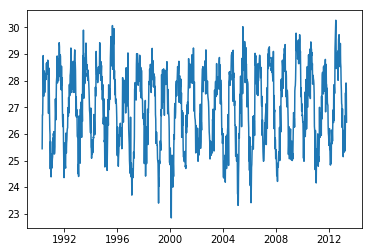

In [17]:
fig, ax = plt.subplots()
ax.plot('week_start_date', 'station_avg_temp_c', data=sj_features)

plt.show()


It seems to work, right?
## Q: What problem do we have now?
A: We should have the same length for features and labels to fit the model, let's check to be sure

In [18]:
print("Shape of sj_train_features: {}".format(sj_features.shape))
print("Shape of sj_train_labels: {}".format(sj_labels.shape))

Shape of sj_train_features: (1196, 36)
Shape of sj_train_labels: (936, 4)


Issue:

Oh dear, the shapes do not match, what happened?

Solution: (I forgot to resplit train and test after data preprocessing, genuine error :-)
# Start with adding train and test labels when you combine the two data frames to avoid this next time  

## Q: How can we solve this now?

In [19]:
#I am pretty sure there is a more elegant way to do this, but this works, too ¯\_(ツ)_/¯
adf['Train_Test']="Train"
adf1['Train_Test']="Test"
all_feature['Train_Test']=adf['Train_Test'].append(adf1['Train_Test'],ignore_index=True)
iq_Train_Test = all_feature.loc[all_feature['city']=='iq', ['Train_Test']]
sj_Train_Test = all_feature.loc[all_feature['city']=='sj', ['Train_Test']]
iq_features=pd.concat([iq_features, iq_Train_Test],axis=1)
sj_features=pd.concat([sj_features, sj_Train_Test],axis=1)
iq_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,station_max_temp_c_1,station_max_temp_c_2,station_max_temp_c_3,station_min_temp_c_1,station_min_temp_c_2,station_min_temp_c_3,station_precip_mm_1,station_precip_mm_2,station_precip_mm_3,Train_Test
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,32.5,32.5,32.5,20.7,20.7,20.7,3.0,3.0,3.0,Train
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,32.5,32.5,32.5,20.7,20.7,20.7,3.0,3.0,3.0,Train
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,34.0,32.5,32.5,20.8,20.7,20.7,55.6,3.0,3.0,Train
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,33.0,34.0,32.5,20.7,20.8,20.7,38.1,55.6,3.0,Train
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,31.5,33.0,34.0,14.7,20.7,20.8,30.0,38.1,55.6,Train


In [20]:
sj_features.tail()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,station_max_temp_c_1,station_max_temp_c_2,station_max_temp_c_3,station_min_temp_c_1,station_min_temp_c_2,station_min_temp_c_3,station_precip_mm_1,station_precip_mm_2,station_precip_mm_3,Train_Test
1711,sj,2013,13,2013-03-26,-0.08740,-0.016183,0.156343,0.105186,30.34,298.670000,...,29.4,30.0,32.8,21.7,21.7,21.7,4.8,17.1,6.6,Test
1712,sj,2013,14,2013-04-02,-0.20325,-0.077833,0.204171,0.178914,6.55,298.035714,...,33.9,29.4,30.0,22.8,21.7,21.7,3.5,4.8,17.1,Test
1713,sj,2013,15,2013-04-09,-0.11760,-0.008200,0.192700,0.170429,0.00,299.057143,...,33.3,33.9,29.4,22.8,22.8,21.7,17.6,3.5,4.8,Test
1714,sj,2013,16,2013-04-16,0.08275,0.031200,0.135014,0.074857,0.00,298.912857,...,32.8,33.3,33.9,23.3,22.8,22.8,9.4,17.6,3.5,Test
1715,sj,2013,17,2013-04-23,-0.08730,-0.048667,0.129814,0.117671,45.47,298.067143,...,31.7,32.8,33.3,23.9,23.3,22.8,22.9,9.4,17.6,Test


In [21]:
sj_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,station_max_temp_c_1,station_max_temp_c_2,station_max_temp_c_3,station_min_temp_c_1,station_min_temp_c_2,station_min_temp_c_3,station_precip_mm_1,station_precip_mm_2,station_precip_mm_3,Train_Test
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,29.4,29.4,29.4,20.0,20.0,20.0,16.0,16.0,16.0,Train
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,29.4,29.4,29.4,20.0,20.0,20.0,16.0,16.0,16.0,Train
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,31.7,29.4,29.4,22.2,20.0,20.0,8.6,16.0,16.0,Train
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,32.2,31.7,29.4,22.8,22.2,20.0,41.4,8.6,16.0,Train
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,33.3,32.2,31.7,23.3,22.8,22.2,4.0,41.4,8.6,Train


In [22]:
# Separate training and test data for San Juan
sj_train_features = sj_features.loc[sj_features['Train_Test']=='Train' ].copy() 
sj_test_features = sj_features.loc[sj_features['Train_Test']=='Test' ].copy()

sj_train_labels = sj_labels['total_cases'].copy() #INFO:not the most elegant way to do this, but y need to be in a single column format when fitting the model
sj_train_features.tail()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,station_max_temp_c_1,station_max_temp_c_2,station_max_temp_c_3,station_min_temp_c_1,station_min_temp_c_2,station_min_temp_c_3,station_precip_mm_1,station_precip_mm_2,station_precip_mm_3,Train_Test
931,sj,2008,13,2008-03-25,0.07785,-0.039900,0.310471,0.296243,27.19,296.958571,...,30.0,28.9,29.4,20.6,22.2,21.1,0.5,4.4,13.0,Train
932,sj,2008,14,2008-04-01,-0.03800,-0.016833,0.119371,0.066386,3.82,298.081429,...,30.0,30.0,28.9,21.1,20.6,22.2,1.8,0.5,4.4,Train
933,sj,2008,15,2008-04-08,-0.15520,-0.052750,0.137757,0.141214,16.96,297.460000,...,30.6,30.0,30.0,22.2,21.1,20.6,0.5,1.8,0.5,Train
934,sj,2008,16,2008-04-15,0.00180,-0.010367,0.203900,0.209843,0.00,297.630000,...,29.4,30.6,30.0,21.7,22.2,21.1,30.7,0.5,1.8,Train
935,sj,2008,17,2008-04-22,-0.03700,-0.010367,0.077314,0.090586,0.00,298.672857,...,29.4,29.4,30.6,21.7,21.7,22.2,11.2,30.7,0.5,Train


## Exercise 4:
Make the same labeling on the Iquitos data!

In [23]:
iq_train_features = iq_features.loc[iq_features['Train_Test']=='Train' ].copy() 
iq_test_features = iq_features.loc[iq_features['Train_Test']=='Test' ].copy()

iq_train_labels=iq_labels['total_cases'].copy() #INFO:not the most elegant way to do this, but y need to be in a single column format when fitting the model
iq_train_features.tail()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,station_max_temp_c_1,station_max_temp_c_2,station_max_temp_c_3,station_min_temp_c_1,station_min_temp_c_2,station_min_temp_c_3,station_precip_mm_1,station_precip_mm_2,station_precip_mm_3,Train_Test
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,34.0,33.7,33.2,20.0,21.2,21.4,2.5,32.0,8.1,Train
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,35.4,34.0,33.7,22.4,20.0,21.2,27.0,2.5,32.0,Train
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,34.7,35.4,34.0,21.7,22.4,20.0,36.6,27.0,2.5,Train
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,32.2,34.7,35.4,19.2,21.7,22.4,7.4,36.6,27.0,Train
1455,iq,2010,25,2010-06-25,0.298186,0.232971,0.274214,0.315757,63.22,298.097143,...,31.2,32.2,34.7,21.0,19.2,21.7,16.0,7.4,36.6,Train


## Break around here

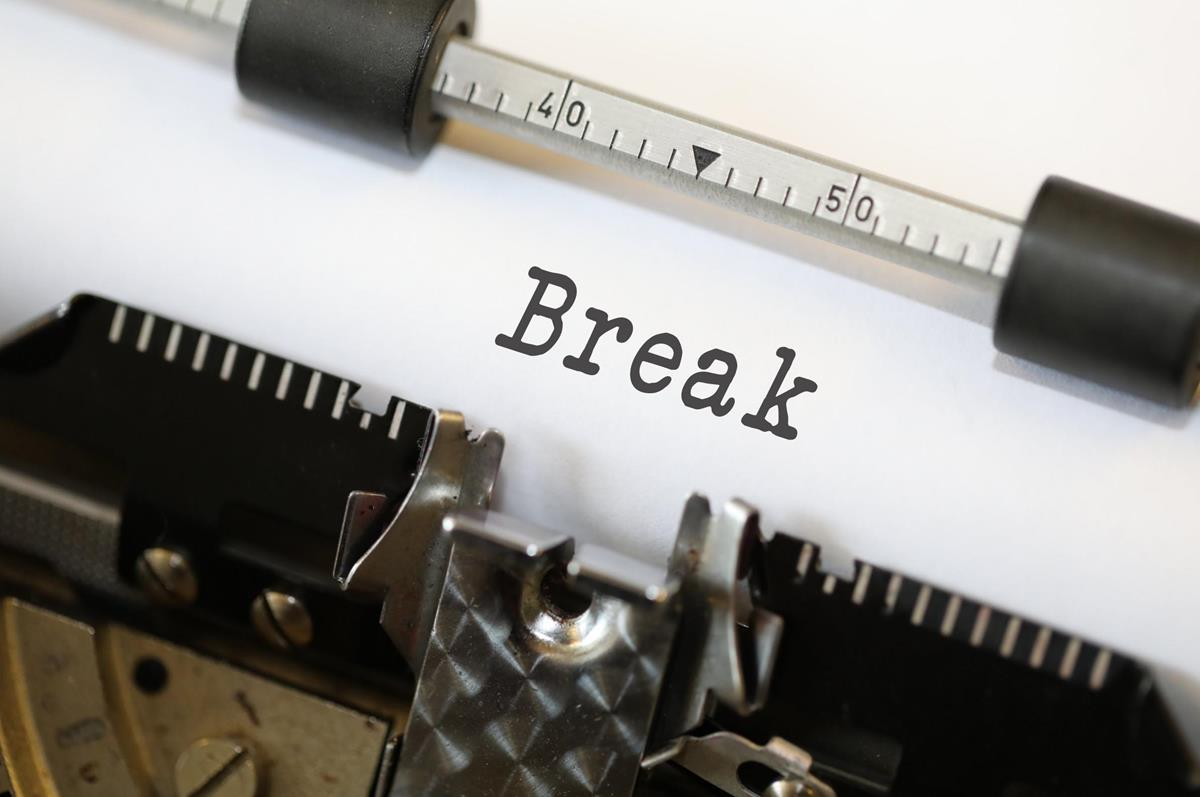

In [24]:
all_feature.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'Train_Test'],
      dtype='object')

INFO: XGBoost cannot deal with strings...


...nor with date time format


Hence you need to create a data frame which only includes the features we want to inlcude in the model

## Q: How can you achieve this?

"""Solution: A relatively easy and foolproof way is to define the features we want to include in our model like this
(I also added the shifted features). If you modify this list, you can rerun the models on
a different set of labels without needing to change anything else below"""


If you want, you can define separate set of features for the two models, e.g. selected_features_sj


We then use this to create the new data frame which contains only the required features

In [25]:
selected_features=[
'station_avg_temp_c',                                     
'station_max_temp_c',                      
'station_min_temp_c',                       
'station_precip_mm',
'station_avg_temp_c_1',                                     
'station_max_temp_c_1',                      
'station_min_temp_c_1',                       
'station_precip_mm_1',
'station_avg_temp_c_2',                                     
'station_max_temp_c_2',                      
'station_min_temp_c_2',                       
'station_precip_mm_2',
'station_avg_temp_c_3',                                     
'station_max_temp_c_3',                      
'station_min_temp_c_3',                       
'station_precip_mm_3']
sj_train_features_stripped = sj_train_features[selected_features].copy()
sj_train_features_stripped.head()


,station_avg_temp_c,station_max_temp_c,station_min_temp_c,station_precip_mm,station_avg_temp_c_1,station_max_temp_c_1,station_min_temp_c_1,station_precip_mm_1,station_avg_temp_c_2,station_max_temp_c_2,station_min_temp_c_2,station_precip_mm_2,station_avg_temp_c_3,station_max_temp_c_3,station_min_temp_c_3,station_precip_mm_3
0,25.442857,29.4,20.0,16.0,25.442857,29.4,20.0,16.0,25.442857,29.4,20.0,16.0,25.442857,29.4,20.0,16.0
1,26.714286,31.7,22.2,8.6,25.442857,29.4,20.0,16.0,25.442857,29.4,20.0,16.0,25.442857,29.4,20.0,16.0
2,26.714286,32.2,22.8,41.4,26.714286,31.7,22.2,8.6,25.442857,29.4,20.0,16.0,25.442857,29.4,20.0,16.0
3,27.471429,33.3,23.3,4.0,26.714286,32.2,22.8,41.4,26.714286,31.7,22.2,8.6,25.442857,29.4,20.0,16.0
4,28.942857,35.0,23.9,5.8,27.471429,33.3,23.3,4.0,26.714286,32.2,22.8,41.4,26.714286,31.7,22.2,8.6


## Exercise 5 Create iq_train_features_stripped!

In [26]:
#Solution 5
iq_train_features_stripped = iq_train_features[selected_features].copy()
iq_train_features_stripped.head()


,station_avg_temp_c,station_max_temp_c,station_min_temp_c,station_precip_mm,station_avg_temp_c_1,station_max_temp_c_1,station_min_temp_c_1,station_precip_mm_1,station_avg_temp_c_2,station_max_temp_c_2,station_min_temp_c_2,station_precip_mm_2,station_avg_temp_c_3,station_max_temp_c_3,station_min_temp_c_3,station_precip_mm_3
936,26.400000,32.5,20.7,3.0,26.400000,32.5,20.7,3.0,26.4,32.5,20.7,3.0,26.4,32.5,20.7,3.0
937,26.900000,34.0,20.8,55.6,26.400000,32.5,20.7,3.0,26.4,32.5,20.7,3.0,26.4,32.5,20.7,3.0
938,26.800000,33.0,20.7,38.1,26.900000,34.0,20.8,55.6,26.4,32.5,20.7,3.0,26.4,32.5,20.7,3.0
939,25.766667,31.5,14.7,30.0,26.800000,33.0,20.7,38.1,26.9,34.0,20.8,55.6,26.4,32.5,20.7,3.0
940,26.600000,33.3,19.1,4.0,25.766667,31.5,14.7,30.0,26.8,33.0,20.7,38.1,26.9,34.0,20.8,55.6


In [27]:
#double checking that the dimension add upp
print(sj_train_features.shape)
print(sj_train_features_stripped.shape)
print(sj_train_labels.shape)


(936, 37)
(936, 16)
(936,)


## Here comes the actual model fitting part

We will train two separate models for the two cities

In [28]:
#we import some additional functions we are going to use 
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error

First, we need to create a training and a "test" set (this is an unfortunate naming convention, as this does not refer to the  test set which we created earlier).

Luckily, there is a function exactly for this in sklearn!

(INFO: This (model) test data is for testing the model's performance on the test data. The previous one is the (unlabeled) test data, from which we are going to make the predictions (the missing labels_test.csv file). We will upload the resulting 'labels_test' file to the competiton's platform as a solution.)

In [29]:
# Create training and test sets for San Juan
X_train, X_test, y_train, y_test = train_test_split(sj_train_features_stripped,sj_train_labels, test_size=0.3, random_state=42)
#X in our case is sj_train_features_stripped, and y is sj_train_labels

The next step is setting which algorithm you want to use for building the model. You also have the possibility to
set the parameters at this step.

To make it simple, we use sklearn's Gradient Boosting regression function. 

INFO: # You can read about this model and its parameters here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor

(This is not the optimal model for this data, see http://drivendata.co/blog/dengue-benchmark/)

## Homework: Instead of Gradient Boosting, use a NegativeBinomial model for your prediction!

First, we create the regressor! Again, for the sake of simplicity, we use the default settings for now.

In [30]:
xg_reg_sj = ensemble.GradientBoostingRegressor()

Then you need to fit this model to your dataset in another step:

In [31]:
xg_reg_sj.fit(X_train, y_train)
#here you can see the deafult settings and the parameters you can customize in this regressor

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

Now, your model is ready to make some predicitons!

In [32]:
# Predict the labels of the test set
sj_preds = xg_reg_sj.predict(X_test).astype(int) #these are the predictions for only the randomly splitted (model) test df
sj_preds_vis = xg_reg_sj.predict(sj_train_features_stripped).astype(int) #these are the predictions for all cases in the training feature df

#we need to transform them from float to integers (hence "".astype(int)"" because we did not use a model which would have predicted count data (but it is not realistic to have 1.45 patients)


To evaluate what this model achieved so far, we should calculate the metrics this challenge utilizes: mean absolute error
    
INFO: https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error

In [33]:
# Compute metrics
mean_abs_err =(mean_absolute_error(y_test, sj_preds))
print("mean absolute error: %f" % (mean_abs_err))

mean absolute error: 31.156584


Visually,  if plotted against the actual values, this performance looks like this:

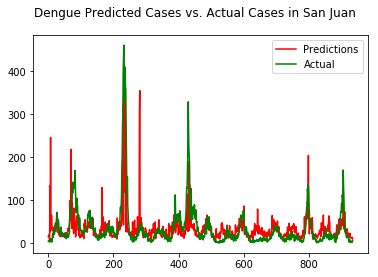

In [34]:
#here I plotted them on the same figure, while I plotted them separetely in case of Iq
sj_preds_vis = pd.Series(data=sj_preds_vis)

plt.plot(sj_preds_vis, color="red", label="Predictions")

plt.plot(sj_labels.total_cases, color='green',label="Actual")


plt.suptitle("Dengue Predicted Cases vs. Actual Cases in San Juan")
plt.legend()
plt.show()

There is only the most important step left for us, to predict the missing labels_test from the unlabeled test data:

## Exercise 6 & 7: 
Do this lat step for San Juan, then repeat the whole procedure on the Iq data!

In [35]:
#Solution 6
iq_train_features_stripped
sj_test_features_stripped=sj_test_features[selected_features].copy()
sj_preds_submission = xg_reg_sj.predict(sj_test_features_stripped).astype(int)

In [36]:
#Solution 7 same for iq
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(iq_train_features_stripped,iq_train_labels, test_size=0.3, random_state=42)

# Create the regressor: xg_reg_iq
xg_reg_iq = ensemble.GradientBoostingRegressor()

# Fit the regressor to the train set
xg_reg_iq.fit(X_train, y_train)

# Predict the labels of the test set
iq_preds = xg_reg_iq.predict(X_test).astype(int)
iq_preds_vis = xg_reg_iq.predict(iq_train_features_stripped).astype(int)

#compute submission values
iq_test_features_stripped=iq_test_features[selected_features].copy()
iq_preds_submission = xg_reg_iq.predict(iq_test_features_stripped).astype(int)

# Compute metrics
mean_abs_err =(mean_absolute_error(y_test, iq_preds))
print("mean absolute error: %f" % (mean_abs_err))

mean absolute error: 7.628205


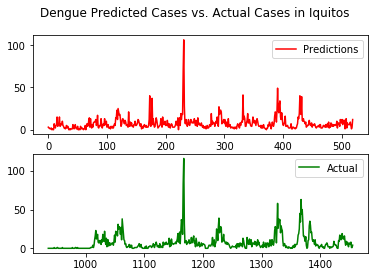

In [37]:
iq_preds_vis = pd.Series(data=iq_preds_vis)
figs, axes = plt.subplots(nrows=2, ncols=1)

# plot sj
plt.subplot(211)
plt.plot(iq_preds_vis, color="red", label="Predictions")
plt.legend(loc='upper right')
plt.subplot(212)
plt.plot(iq_labels.total_cases, color='green',label="Actual")


plt.suptitle("Dengue Predicted Cases vs. Actual Cases in Iquitos")
plt.legend()
plt.show()

## Q: mean absolute error values are really different for the two cities, what can the reason for this?

Let's create the submission file for the challenge

In [38]:
submission = pd.read_csv("submission_format.csv",
                         index_col=[0, 1, 2]) #this reads in the sample submission file which was provided for us

submission.total_cases = np.concatenate([iq_preds_submission, sj_preds_submission]) #this overwrites the total_cases column with our predictions
submission.to_csv("benchmark_budapestpy.csv") #this writes it to a csv file

Submit your first solution csv file on their site: https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/submissions/

Try to improve your score via changing around some things during data preparation, with a different type of regressor, doing some feature engineering...


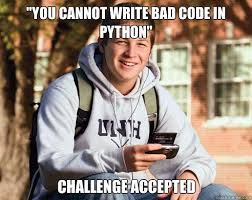